In [1]:
#importing
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 

In [2]:
#dataset
df = pd.read_csv("C:/Users/MADHUSUDAN/Downloads/edX.csv")
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [3]:
#summarize
df.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

In [4]:
#some of the features
df1 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df1.head(9)

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
5         3.5          6                  10.0           230
6         3.5          6                  10.1           232
7         3.7          6                  11.1           255
8         3.7          6                  11.6           267

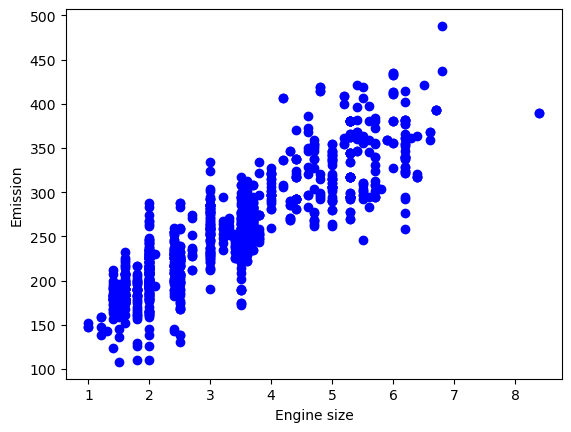

In [5]:
#plotting
plt.scatter(df1.ENGINESIZE, df1.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [6]:
#splitting
split = np.random.rand(len(df)) < 0.8
train = df1[split]
test = df1[~split]

In [7]:
#degree2

In [8]:
#training & testing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
poly = PolynomialFeatures(degree=2)
transform = poly.fit_transform(train_x)
print(transform)

[[ 1.    2.    4.  ]
 [ 1.    2.4   5.76]
 [ 1.    1.5   2.25]
 ...
 [ 1.    3.    9.  ]
 [ 1.    3.2  10.24]
 [ 1.    3.2  10.24]]


In [9]:
#modelling
reg = linear_model.LinearRegression()
fit = reg.fit(transform, train_y)

In [10]:
print ('Coefficients: ', reg.coef_)

Coefficients:  [[ 0.         48.74413991 -1.27305864]]


In [11]:
print ('Intercept: ',reg.intercept_)

Intercept:  [109.81861351]


In [12]:
#plotting
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='purple')
x = np.arange(0.0, 10.0, 0.1)
y = reg.intercept_[0] + reg.coef_[0][1] * x + reg.coef_[0][2] * np.power(x, 2)
plt.plot(x, y, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

In [13]:
#calculations
from sklearn.metrics import r2_score
trans = poly.transform(test_x)
predict = reg.predict(trans)

In [14]:
print("Mean Absolute Error (MAE) : %.2f" % np.mean(np.absolute(predict - test_y)))

Mean Absolute Error (MAE) : 21.73


In [15]:
print("Residual Sum of Squares (MSE) : %.2f" % np.mean((predict - test_y) ** 2))

Residual Sum of Squares (MSE) : 808.17


In [16]:
print("R2 Score : %.2f" % r2_score(test_y, predict) )

R2 Score : 0.82


In [17]:
#degree3

In [18]:
#train & test
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
poly = PolynomialFeatures(degree = 3)
transform = poly.fit_transform(train_x)
print(transform)

[[ 1.     2.     4.     8.   ]
 [ 1.     2.4    5.76  13.824]
 [ 1.     1.5    2.25   3.375]
 ...
 [ 1.     3.     9.    27.   ]
 [ 1.     3.2   10.24  32.768]
 [ 1.     3.2   10.24  32.768]]


In [19]:
#modelling
reg = linear_model.LinearRegression()
fit = reg.fit(transform, train_y)

In [20]:
print("Coefficients : ",reg.coef_)

Coefficients :  [[ 0.         31.85864333  3.66570684 -0.4368753 ]]


In [21]:
print("Intercept : ",reg.intercept_)

Intercept :  [126.88885495]


In [22]:
#plotting
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='gold')
x = np.arange(0.0, 10.0, 1.0)
y = reg.intercept_[0] + reg.coef_[0][1] * x + reg.coef_[0][2] * np.power(x, 2)
plt.plot(x, y, '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

Text(0, 0.5, 'CO2EMISSIONS')

In [23]:
#calculations
from sklearn.metrics import r2_score
trans = poly.transform(test_x)
predict = reg.predict(trans)

In [24]:
print("Mean Absolute Error (MAE) : %.2f" % np.mean(np.absolute(predict - test_y)))

Mean Absolute Error (MAE) : 21.45


In [25]:
print("Residual Sum of Squares (MSE) : %.2f" %np.mean((predict - test_y)) ** 2)

Residual Sum of Squares (MSE) : 1.09


In [26]:
print("R2 Score : %.2f" % r2_score(test_y, predict))

R2 Score : 0.83
